<a href="https://colab.research.google.com/github/soyab266/test/blob/master/multiple_linear_regression_coef%2C_intercept%202.23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtd=DecisionTreeRegressor()
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score



In [29]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)


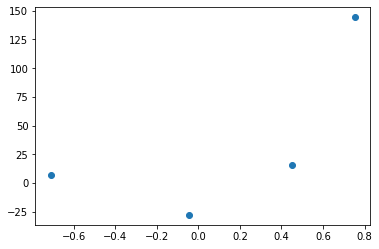

In [30]:
plt.scatter(X,y)

In [31]:
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.2, random_state=2)

In [32]:
X_train.shape

(3, 1)

In [33]:
X_test.shape

(1, 1)

In [37]:
lr=LinearRegression()
lr.fit(X, y)

LinearRegression()

In [38]:
lr.coef_

array([78.35063668])

In [39]:
lr.intercept_

26.15963284313262

In [40]:
y_pred=lr.predict(X_test)

In [41]:
r2_score(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

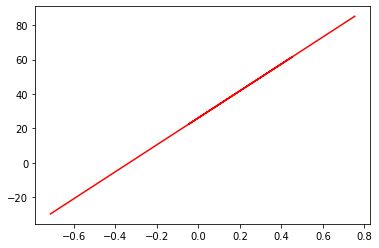

In [42]:
plt.plot(X,lr.predict(X), color='r')

consider m=78.35
 and b=0

In [46]:
y_pred= ((78.35* X)+ 0).reshape(4)
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

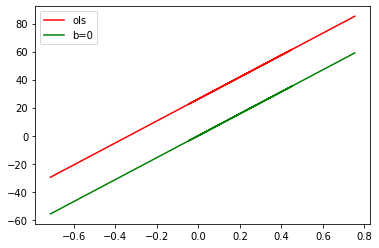

In [51]:
plt.plot(X,lr.predict(X), color='r', label='ols')
plt.plot(X,y_pred, color= 'green', label=('b=0'))
plt.legend()
plt.show()

In [58]:
loss_slope= -2*np.sum(y-78.35*X.ravel()-0) # m=78.35 , b=0
loss_slope

-209.27763408209216

In [56]:
learning_rate=0.1 # consider learning_rate=0.1
step_size= loss_slope * learning_rate
step_size

-20.927763408209216

In [59]:
#bnew= bold - step_size
b_new= 0-(-20)
b_new

20

In [90]:
# now b=20, m=78.35
y_pred1 = ((78.35 * X)+ 20 ).reshape(4)

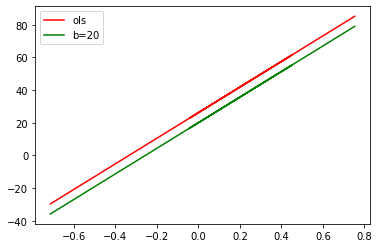

In [91]:
plt.plot(X,lr.predict(X), color='r', label='ols')
plt.plot(X,y_pred1, color= 'green', label=('b=20'))
plt.legend()
plt.show()

In [92]:
 # now b=20, m=78.35
 loss_slope=  -2*np.sum(y-78.35* X.ravel()-20)
 loss_slope

-49.27763408209216

In [93]:
step_size= loss_slope * learning_rate
step_size

-4.927763408209216

In [94]:
b_new= 20 - step_size
b_new


24.927763408209216

In [95]:
y_pred2= ((78.35* X) + 24.92).reshape(4)

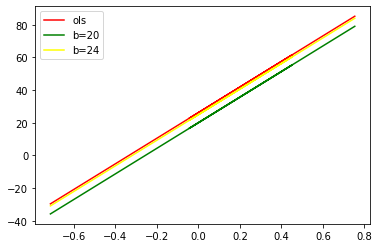

In [97]:
plt.plot(X,lr.predict(X), color='r', label='ols')
plt.plot(X,y_pred1, color= 'green', label=('b=20'))
plt.plot(X,y_pred2, color= 'yellow', label=('b=24'))
plt.legend()
plt.show()

In [ ]:
#NOW B=24.92 AND M=78.35

In [76]:
loss_slope= -2*np.sum(y- 78.35 * X.ravel()- 24.92)
loss_slope

-9.91763408209215

In [78]:
step_size= loss_slope * learning_rate # learning _rate= 0.1 
step_size

-0.991763408209215

In [79]:
b_new= 24.92 - step_size
b_new

25.911763408209218

In [100]:
y_pred3= ((78.35 * X) + b_new).reshape(4)

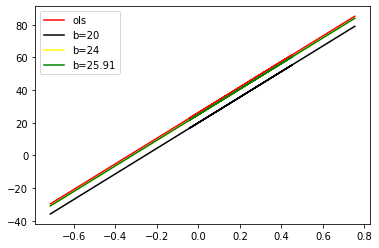

In [104]:
plt.plot(X,lr.predict(X), color='r', label='ols')
plt.plot(X,y_pred1, color= 'black', label=('b=20'))
plt.plot(X,y_pred2, color= 'yellow', label=('b=24'))
plt.plot(X,y_pred3, color= 'green', label=('b=25.91'))
plt.legend()
plt.show()

In [85]:
loss_slope= -2 * np.sum(y-78.35 *X.ravel() - 25.911763408209218)
loss_slope

-1.9835268164184185

In [86]:
step_size= loss_slope * learning_rate
step_size

-0.19835268164184186

In [87]:
b_new = 25.911763408209218- 0.19835268164184186
b_new

25.713410726567375

In [103]:
y_pred4= ((78.35 * X ) + 25.713410726567375).reshape(4)

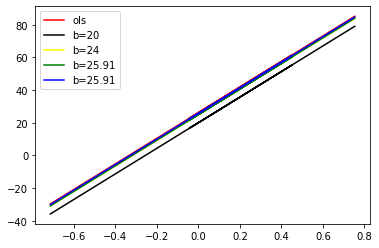

In [105]:
plt.plot(X,lr.predict(X), color='r', label='ols')
plt.plot(X,y_pred1, color= 'black', label=('b=20'))
plt.plot(X,y_pred2, color= 'yellow', label=('b=24'))
plt.plot(X,y_pred3, color= 'green', label=('b=25.91'))
plt.plot(X,y_pred4, color= 'blue', label=('b=25.91'))
plt.legend()
plt.show()

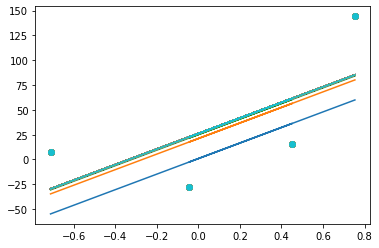

In [112]:
m=78.35
b=-100
learning_rate=0.1
epochs=100
for i in range(epochs):
  loss_slope= -2*np.sum(y-m*X.ravel() - b)

  b= b-( learning_rate * loss_slope)
  y_pred= m * X + b
  plt.plot(X,y_pred)
  plt.scatter(X,y)